# IMDb Movies Dataset Analysis

#### Through the EDA I aim to answer the following questions:
- Number of Movies per Year
- Number of Movies per Country
- Number of Movies per Genre (based on keywords)
- Null Values Analysis 

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

### Load the main attributes of IMDb datasets
- Film Scripts (Web Scraped)
- Film Based Details
- Film Keywords 

In [2]:
keywords = pd.read_csv('film_keywords.tsv', sep='\t')

In [4]:
base_details = pd.read_csv('films_base_details.tsv', sep='\t')

In [12]:
df = pd.read_csv('processed_scripts.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Movie Name,Script/Subtitle Text,Processed Script
0,My Sassy Girl,- This is the storyof the first and last timeI...,"['Ġthis', 'Ġis', 'Ġthe', 'Ġstory', 'Ġthe', 'Ġf..."
1,Friday After Next,"'Twas the night before Christmas,and all throu...","['tw', 'Ġthe', 'Ġnight', 'Ġbefore', 'Ġchrist',..."
2,Zillion,"1If you're stupid, thenyou can easily hide tha...","['Ġyou', 'Ġstupid', 'Ġthen', 'Ġcan', 'Ġeasily'..."
3,2002,"This is roof.Where did she fall from?Sir, she ...","['Ġis', 'Ġroof', 'Ġdid', 'Ġshe', 'Ġfall', 'Ġfr..."
4,Area 51,"1Reid, Ben, and Darrin and I,we've been friend...","['id', 'Ġben', 'Ġand', 'Ġd', 'arr', 'Ġand', 'Ġ..."
...,...,...,...
22644,Yellow Sky,"[Thunderclap]Hey, look at that!Look. Right thr...","['hey', 'Ġlook', 'Ġat', 'Ġthat', 'look', 'Ġrig..."
22645,You Gotta Stay Happy,"We've been waitingsome time.Hey! Hey, pop!Excu...","['Ġbeen', 'Ġwait', 'ings', 'ome', 'Ġtime', 'he..."
22646,Mama,Hearing-transcriptedEnglish subtitle by watdde...,"['aring', 'trans', 'cript', 'ed', 'english', '..."
22647,A Haunting We Will Go,"Well, gentlemen, we trust you|spent a comforta...","['well', 'Ġgentlemen', 'Ġwe', 'Ġtrust', 'Ġyou'..."


## 1. Handling Release Dates
### Analyse Movies per Year 
- Extracting Release Dates: I filtered the base_details dataset to get only rows where the detail_item is "Release date".
- Date Conversion: Split the detail_result column at the first parenthesis to remove extra information and used pd.to_datetime to convert the extracted string to a year.

In [5]:
release_dates = base_details[base_details['detail_item'] == 'Release date'].copy()

release_dates.loc[:, 'release_year'] = pd.to_datetime(release_dates['detail_result'].str.split('(').str[0], errors='coerce').dt.year

release_dates

,detail_item,detail_result,film_id,release_year
0,Release date,"October 14, 1994 (United States)",tt0111161,1994
8,Release date,"July 18, 2008 (United States)",tt0468569,2008
20,Release date,"July 16, 2010 (United States)",tt1375666,2010
33,Release date,"October 15, 1999 (United States)",tt0137523,1999
44,Release date,"April 17, 2011 (United States)",tt0944947,2011
...,...,...,...,...
867430,Release date,"February 25, 1982 (Hong Kong)",tt0079899,1982
867435,Release date,"March 18, 1964 (France)",tt0058186,1964
867441,Release date,1966 (Soviet Union),tt0060989,1966
867446,Release date,"January 28, 2005 (United States)",tt0439618,2005


## 2. Visualise Movies Released Per Decade
Once the release years were extracted, I grouped the movies by year and created visualizations to show trends in movie production over time and divided the data by decades for a clearer analysis.

### Main Findings:
- Increase in Movie Production: A sharp increase in the number of movies released was observed after the 1980s.
- Decade Grouping: The bar chart clearly shows how movie production increased across different decades, with the 2000s and 2010s having the highest numbers.

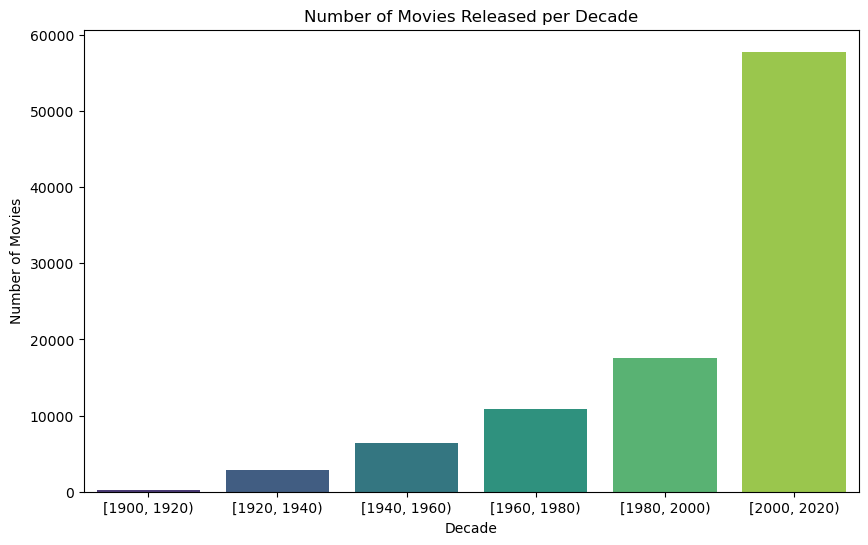

In [14]:
movies_per_year = release_dates['release_year'].value_counts().sort_index()

decade_bins = pd.cut(release_dates['release_year'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], right=False)
movies_per_decade = release_dates.groupby(decade_bins)['film_id'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=movies_per_decade.index.astype(str), y=movies_per_decade.values, palette="viridis")
plt.title('Number of Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

### Main Findings from the Analysis of Movie Releases by Year

1. **Increasing Trend in Movie Production**:
   - A general upward trend in movie production is observed over time, especially from the 1980s onward. This reflects the growing accessibility of film production and distribution technologies.

2. **Significant Growth in the 2000s and 2010s**:
   - The number of movies released surged in the 2000s and peaked in the 2010s, likely due to factors such as the rise of digital production, streaming services, and globalization of the film industry.

3. **Impact of Early Cinematic Milestones**:
   - Earlier decades (e.g., 1920s–1940s) show steady but lower movie release counts, correlating with the development phases of the film industry, where production was mostly centralized in Hollywood and a few other major markets.

4. **Fluctuations in Certain Decades**:
   - Some decades show fluctuations, likely due to global events. For instance:
     - A drop in movie production during the 1940s, possibly due to World War II.
     - A resurgence in the 1950s and 1960s as the film industry expanded internationally.

5. **Globalization and Technology**:
   - The spike in releases from the 1990s onward suggests increased global participation in the film industry. Advances in technology and the internet enabled a larger number of countries and independent studios to enter the market.

6. **Recent Variability**:
   - The 2020s, while still ongoing, show some variability, likely due to recent global events affecting production schedules and the adaptation of new distribution models, such as streaming-first releases.

## 3. Movies Per Country 
Analyzed the origin of movies based on the country information from the base_details dataset and grouped the countries by continents to provide a higher-level view of the data.

In [16]:
countries = base_details[base_details['detail_item'] == 'Country of origin']
movies_per_country = countries['detail_result'].value_counts()
movies_per_country

United States     38912
India              8920
United Kingdom     6664
Japan              4776
France             3306
                  ...  
Laos                  1
Liechtenstein         1
Montenegro            1
Angola                1
North Vietnam         1
Name: detail_result, Length: 137, dtype: int64

### Extract all of the available countries from base_details dataset

In [17]:
countries = base_details[base_details['detail_item'] == 'Country of origin']

unique_countries = countries['detail_result'].unique()

print("List of all available countries:")
print(unique_countries)

List of all available countries:
['United States' 'Australia' 'South Korea' 'France' 'Japan' 'Italy'
 'United Kingdom' 'India' 'Spain' 'Mexico' 'Canada' 'Germany'
 'New Zealand' 'Sweden' 'Iran' 'Soviet Union' 'Hong Kong' 'Greece'
 'Turkey' 'Poland' 'Netherlands' 'Brazil' 'Austria' 'Serbia' 'Norway'
 'Egypt' 'Denmark' 'South Africa' 'Argentina' 'Russia' 'China' 'Hungary'
 'Thailand' 'Belgium' 'Kazakhstan' 'Lithuania' 'Israel' 'Pakistan'
 'Bangladesh' 'West Germany' 'Bulgaria' 'Ireland' 'Taiwan' 'Switzerland'
 'North Macedonia' 'United Arab Emirates' 'Sri Lanka'
 'Federal Republic of Yugoslavia' 'Yugoslavia' 'Iceland' 'Indonesia'
 'Romania' 'Estonia' 'Philippines' 'Occupied Palestinian Territory'
 'Czechoslovakia' 'Saudi Arabia' 'Chile' 'Czech Republic' 'Uganda'
 'Jordan' 'Morocco' 'Finland' 'Uruguay' 'Venezuela' 'Ukraine'
 'Serbia and Montenegro' 'Jamaica' 'Georgia' 'Luxembourg' 'Portugal'
 'Colombia' 'Vietnam' 'Latvia' 'Singapore' 'Cuba' 'Croatia' 'Senegal'
 'Kyrgyzstan' 'Malaysia' 'Sy

## 4. Visualise the Number of Movies per Continent
For clearer analysis and vision, I have divided the groups into continents.

/var/folders/fq/ylhr8mt918z_w0k7l80824rh0000gn/T/ipykernel_20371/1622148466.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries['continent'] = countries['detail_result'].map(country_to_continent)


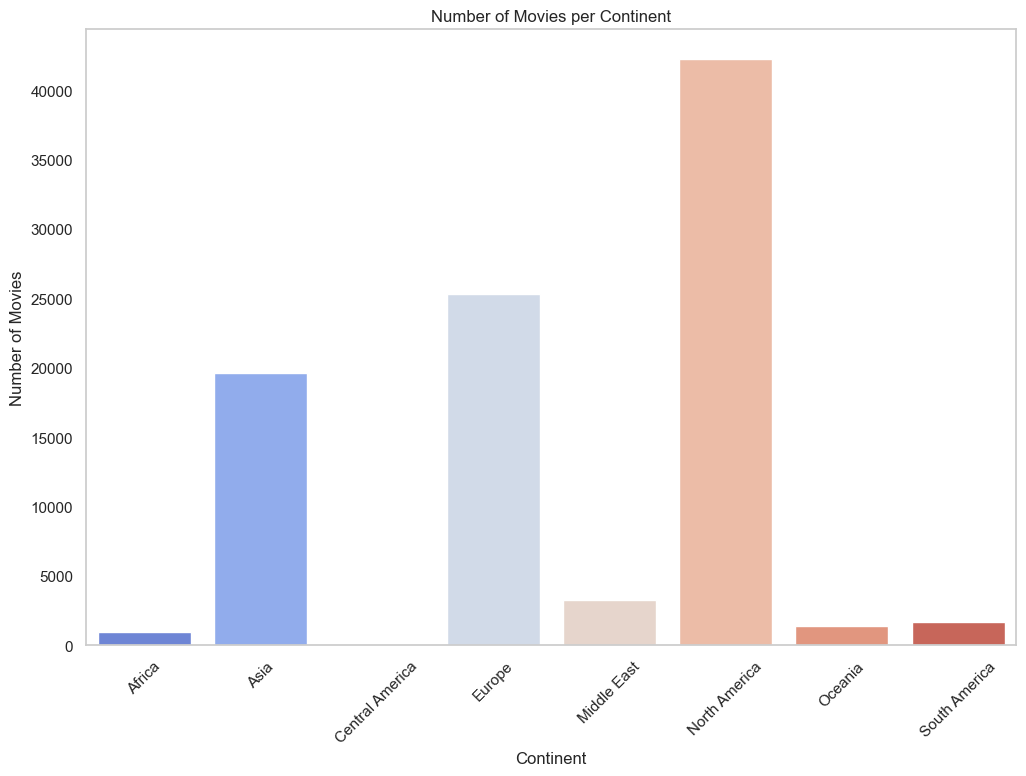

In [18]:
country_to_continent = {
    # North America
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Bahamas': 'North America', 'Trinidad and Tobago': 'North America', 'Greenland': 'North America',
    'Puerto Rico': 'North America', 'Saint Kitts and Nevis': 'North America',

    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    'Colombia': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Ecuador': 'South America', 'Bolivia': 'South America',

    # Europe
    'France': 'Europe', 'United Kingdom': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe',
    'Spain': 'Europe', 'Netherlands': 'Europe', 'Belgium': 'Europe', 'Austria': 'Europe',
    'Switzerland': 'Europe', 'Sweden': 'Europe', 'Norway': 'Europe', 'Denmark': 'Europe',
    'Finland': 'Europe', 'Ireland': 'Europe', 'Luxembourg': 'Europe', 'Portugal': 'Europe',
    'Poland': 'Europe', 'Greece': 'Europe', 'Czech Republic': 'Europe', 'Ukraine': 'Europe',
    'Russia': 'Europe', 'Hungary': 'Europe', 'Romania': 'Europe', 'Bulgaria': 'Europe',
    'Lithuania': 'Europe', 'Serbia': 'Europe', 'Latvia': 'Europe', 'Slovakia': 'Europe',
    'North Macedonia': 'Europe', 'Iceland': 'Europe', 'Estonia': 'Europe', 'Slovenia': 'Europe',
    'Cyprus': 'Europe', 'Albania': 'Europe', 'Montenegro': 'Europe', 'Croatia': 'Europe',
    'Kosovo': 'Europe', 'Georgia': 'Europe', 'Yugoslavia': 'Europe', 'West Germany': 'Europe',
    'East Germany': 'Europe', 'Federal Republic of Yugoslavia': 'Europe', 'Serbia and Montenegro': 'Europe',
    'Soviet Union': 'Europe', 'Liechtenstein': 'Europe', 'Moldova': 'Europe', 'Bosnia and Herzegovina': 'Europe',

    # Asia
    'Japan': 'Asia', 'China': 'Asia', 'India': 'Asia', 'South Korea': 'Asia', 'North Korea': 'Asia',
    'Iran': 'Asia', 'Turkey': 'Asia', 'Israel': 'Asia', 'Pakistan': 'Asia', 'Bangladesh': 'Asia',
    'Indonesia': 'Asia', 'Philippines': 'Asia', 'Thailand': 'Asia', 'Hong Kong': 'Asia',
    'Singapore': 'Asia', 'Saudi Arabia': 'Asia', 'United Arab Emirates': 'Asia', 'Malaysia': 'Asia',
    'Sri Lanka': 'Asia', 'Vietnam': 'Asia', 'Armenia': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia',
    'Syria': 'Asia', 'Lebanon': 'Asia', 'Azerbaijan': 'Asia', 'Taiwan': 'Asia', 'Iraq': 'Asia',
    'Uzbekistan': 'Asia', 'Myanmar': 'Asia', 'Cambodia': 'Asia', 'Qatar': 'Asia', 'Kuwait': 'Asia',
    'Nepal': 'Asia', 'Laos': 'Asia', 'Mongolia': 'Asia', 'Kyrgyzstan': 'Asia', 'Occupied Palestinian Territory': 'Asia',
    'Yemen': 'Asia', 'Brunei': 'Asia', 'Bhutan': 'Asia', 'North Vietnam': 'Asia',

    # Africa
    'Egypt': 'Africa', 'South Africa': 'Africa', 'Nigeria': 'Africa', 'Morocco': 'Africa',
    'Tunisia': 'Africa', 'Kenya': 'Africa', 'Algeria': 'Africa', 'Ghana': 'Africa',
    'Uganda': 'Africa', 'Zimbabwe': 'Africa', 'Zambia': 'Africa', 'Senegal': 'Africa',
    'Mali': 'Africa', 'Burkina Faso': 'Africa', 'Angola': 'Africa', 'Libya': 'Africa',
    'Ivory Coast': 'Africa', 'Ethiopia': 'Africa', "Côte d'Ivoire": 'Africa', 'Cameroon': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',

    # Central America & Caribbean
    'Cuba': 'Central America', 'Jamaica': 'Central America', 'Panama': 'Central America',
    'Dominican Republic': 'Central America', 'Guatemala': 'Central America', 'Costa Rica': 'Central America',

    # Middle East (overlap with Asia, but separate for specificity)
    'Israel': 'Middle East', 'Turkey': 'Middle East', 'Iran': 'Middle East',
    'Saudi Arabia': 'Middle East', 'United Arab Emirates': 'Middle East',
    'Qatar': 'Middle East', 'Jordan': 'Middle East', 'Kuwait': 'Middle East'
}

countries['continent'] = countries['detail_result'].map(country_to_continent)

movies_per_continent = countries.groupby('continent')['film_id'].nunique()

plt.figure(figsize=(12, 8))
sns.barplot(x=movies_per_continent.index, y=movies_per_continent.values, palette="coolwarm")
plt.title('Number of Movies per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Main Findings from the Country-to-Continent Movie Analysis

1. **North America Dominates Movie Production**:
   - North America, particularly the United States, leads in movie production. This is consistent with the presence of Hollywood as a global movie production hub, making North America a significant contributor to the global film industry.

2. **Europe as a Major Contributor**:
   - Europe ranks high in movie production, with many countries like the United Kingdom, France, Germany, and Italy actively producing films. European cinema's rich history and cultural diversity contribute to a wide range of movie themes and genres.

3. **Significant Output from Asia**:
   - Asia also has a notable share of movie production, especially from countries like Japan, India, South Korea, and China. The growth of Bollywood, Japanese anime, and South Korean cinema has expanded Asia’s influence in the global movie industry.

4. **Growing Presence of Latin America and South America**:
   - Latin American and South American countries, such as Brazil, Argentina, and Colombia, show a modest but increasing contribution to movie production. As film industries in these regions grow, so does their influence and visibility on the international stage.

5. **Oceania’s Contribution Led by Australia and New Zealand**:
   - Oceania’s movie production is led mainly by Australia and New Zealand. These countries have produced internationally acclaimed films, contributing to the region’s visibility despite the smaller production scale.

6. **Africa’s Smaller but Diverse Production**:
   - African countries like Nigeria, South Africa, and Egypt contribute to the continent’s movie production. Nigeria’s Nollywood industry, in particular, has rapidly grown to become one of the largest film producers by volume.

7. **Middle East with Focused Production**:
   - Middle Eastern countries such as Israel, Saudi Arabia, and the United Arab Emirates are increasingly active in film production, though the region's output is smaller compared to other continents. Many Middle Eastern movies focus on cultural and socio-political themes unique to the region.

8. **Central America and the Caribbean**:
   - Countries like Cuba, Jamaica, and Panama contribute a modest number of movies, often highlighting unique regional cultures and perspectives. The volume is smaller, but the themes are rich and varied.

## 6. Analyzing Movies per genre (based on keywords)
- Group Similar Keywords: Use a regular expression or keyword mapping to merge similar genres. 
- Remove Generic or Uninformative Keywords: Consider filtering out keywords like "None" or other terms that do not add meaningful categorization.
- Plot Top Categories: After combining and filtering, plot the top categories.

In [20]:
movies_per_genre = dataframes["keywords"].value_counts()
movies_per_genre

keyword               film_id   
delinquent            tt1118804     2
baseball              tt1118804     2
family relationships  tt1118804     2
sarcasm               tt1118804     2
dumpling              tt1118804     2
                                   ..
female rear nudity    tt10375632    1
                      tt10376078    1
                      tt10380900    1
                      tt10383046    1
zyklon b gas          tt0252480     1
Length: 2541733, dtype: int64

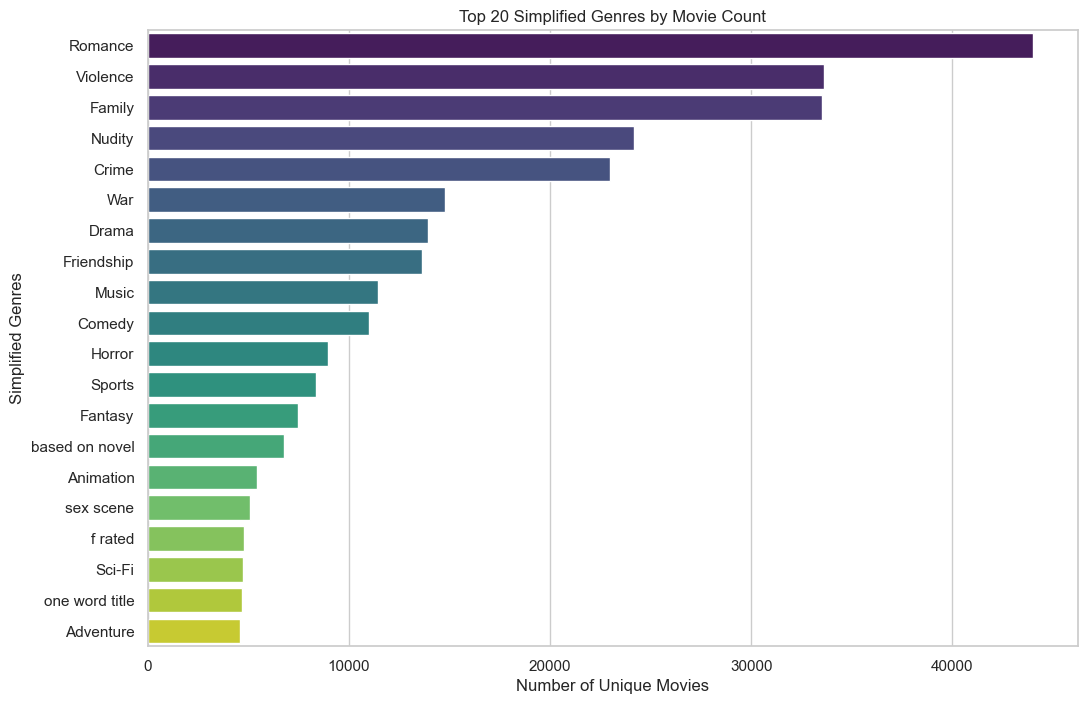

In [21]:
# Step 1: Simplify genre names by merging similar keywords into broader categories
def simplify_keyword(keyword):
    if re.search(r'nudity|naked|bare', keyword, re.IGNORECASE):
        return "Nudity"
    elif re.search(r'violence|murder|death|killing|fight|battle', keyword, re.IGNORECASE):
        return "Violence"
    elif re.search(r'love|romance|relationship|couple|affair|kiss', keyword, re.IGNORECASE):
        return "Romance"
    elif re.search(r'police|detective|crime|criminal|law|justice|prison', keyword, re.IGNORECASE):
        return "Crime"
    elif re.search(r'family|father|mother|son|daughter|sibling|brother|sister|parent|child', keyword, re.IGNORECASE):
        return "Family"
    elif re.search(r'independent film|drama|psychological|emotional', keyword, re.IGNORECASE):
        return "Drama"
    elif re.search(r'fantasy|magic|supernatural|myth|legend|wizard', keyword, re.IGNORECASE):
        return "Fantasy"
    elif re.search(r'comedy|funny|humor|satire|parody|joke', keyword, re.IGNORECASE):
        return "Comedy"
    elif re.search(r'science fiction|sci-fi|alien|space|robot|future|technology', keyword, re.IGNORECASE):
        return "Sci-Fi"
    elif re.search(r'horror|scary|fear|monster|zombie|ghost|vampire', keyword, re.IGNORECASE):
        return "Horror"
    elif re.search(r'war|soldier|battlefield|military|army', keyword, re.IGNORECASE):
        return "War"
    elif re.search(r'sport|game|competition|athlete|baseball|soccer|basketball|tennis', keyword, re.IGNORECASE):
        return "Sports"
    elif re.search(r'biography|documentary|based on true story|real life', keyword, re.IGNORECASE):
        return "Documentary"
    elif re.search(r'music|song|singing|concert|musical|dance', keyword, re.IGNORECASE):
        return "Music"
    elif re.search(r'friend|friendship|buddy|companionship', keyword, re.IGNORECASE):
        return "Friendship"
    elif re.search(r'adventure|exploration|journey|quest|treasure', keyword, re.IGNORECASE):
        return "Adventure"
    elif re.search(r'time travel|parallel universe|alternate reality|dimension', keyword, re.IGNORECASE):
        return "Time Travel"
    elif re.search(r'dystopia|apocalypse|post-apocalyptic|end of world|survival', keyword, re.IGNORECASE):
        return "Apocalyptic"
    elif re.search(r'animation|animated|cartoon|cgi|stop motion', keyword, re.IGNORECASE):
        return "Animation"
    elif re.search(r'political|politics|government|president|election', keyword, re.IGNORECASE):
        return "Political"
    # Default: leave as is if it doesn't match any category
    else:
        return keyword

# Apply simplification to keywords
keywords['simplified_keyword'] = keywords['keyword'].apply(simplify_keyword)

# Step 2: Count unique movies per simplified genre
movies_per_simplified_genre = keywords.groupby("simplified_keyword")["film_id"].nunique()

# Step 3: Remove uninformative genres like "None" if present
movies_per_simplified_genre = movies_per_simplified_genre.drop("None", errors="ignore")

# Step 4: Visualize Top Genres by Movie Count after simplification
top_simplified_genres = movies_per_simplified_genre.nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_simplified_genres.values, y=top_simplified_genres.index, palette="viridis")
plt.title("Top 20 Simplified Genres by Movie Count")
plt.xlabel("Number of Unique Movies")
plt.ylabel("Simplified Genres")
plt.show()

## 7. Analyze missing values in each dataset
#### Main Findings:
- No NULL values in all of the datasets except for:
- Synopsis: film_id it has 33896 null values.

In [22]:
null_analysis = {name: df.isnull().sum().to_dict() for name, df in dataframes.items()}
null_analysis

{'keywords': {'keyword': 0, 'film_id': 0, 'simplified_keyword': 0},
 'locations': {'locations': 0, 'film_id': 0},
 'plots_summary': {'summary': 0, 'film_id': 0, 'summary_id': 0},
 'synopsis': {'synopsis': 0, 'film_id': 33896},
 'base_details': {'detail_item': 0, 'detail_result': 0, 'film_id': 0}}

## Merge Scripts and Countries Dataset to Address Bias 

In [1]:
data = pd.read_csv('final_merged_result.csv')

In [2]:
# Remove unnesscary columns 
data = data.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Processed Script'], axis=1)
data

,Movie Name,final_summary,Script/Subtitle Text
0,tt0111161,"Over the course of several years, two convicts...",NaN
1,tt0468569,When the menace known as the joker wreaks havo...,NaN
2,tt1375666,A thief who steals corporate secrets through t...,NaN
3,tt0137523,An insomniac office worker and a devil-may-car...,NaN
4,tt0109830,The history of the united states from the 1950...,NaN
...,...,...,...
1598323,Yellow Sky,NaN,"[Thunderclap]Hey, look at that!Look. Right thr..."
1598324,You Gotta Stay Happy,NaN,"We've been waitingsome time.Hey! Hey, pop!Excu..."
1598325,Mama,NaN,Hearing-transcriptedEnglish subtitle by watdde...
1598326,A Haunting We Will Go,NaN,"Well, gentlemen, we trust you|spent a comforta..."


#### Null Analysis After Merging 

In [8]:
# Null Value Analysis exatracted in % form 
df = pd.DataFrame(data)

# Calculate the number of nulls per column
null_counts = df.isnull().sum()

# Calculate total number of rows to normalize
total_rows = len(df)

# Calculate null percentage per column
null_percentage = (null_counts / total_rows) * 100

# Create a DataFrame for easy viewing
null_analysis = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentage
})

print(null_analysis)

                      Null Count  Null Percentage (%)
Movie Name                     0              0.00000
final_summary             271788             17.00452
Script/Subtitle Text     1326540             82.99548


#### Number of Movies that are Without Scripts 

In [9]:
# Extract the Number of Movies that are Without Scripts
movies_without_scripts = df[df['Script/Subtitle Text'].isnull()]

# Count unique movies without scripts
unique_movies_without_scripts_count = movies_without_scripts['Movie Name'].nunique()

print("Number of unique movies without scripts:", unique_movies_without_scripts_count)

Number of unique movies without scripts: 110544


#### Define List of Countries 

In [10]:
from collections import Counter

country_keywords = {
    'United States': ['American', 'USA', 'Hollywood'],
    'Australia': ['Australian', 'Sydney', 'Outback'],
    'South Korea': ['Korean', 'Seoul'],
    'France': ['French', 'Paris', 'Cannes'],
    'Japan': ['Japanese', 'Tokyo', 'Anime'],
    'Italy': ['Italian', 'Rome', 'Venice'],
    'United Kingdom': ['British', 'London', 'UK'],
    'India': ['Indian', 'Bollywood', 'Mumbai'],
    'Spain': ['Spanish', 'Madrid', 'Barcelona'],
    'Mexico': ['Mexican', 'Mexico City'],
    'Canada': ['Canadian', 'Toronto'],
    'Germany': ['German', 'Berlin', 'Munich'],
    'New Zealand': ['Kiwi', 'Auckland'],
    'Sweden': ['Swedish', 'Stockholm'],
    'Iran': ['Iranian', 'Tehran'],
    'Soviet Union': ['Soviet', 'USSR'],
    'Hong Kong': ['Hong Kong'],
    'Greece': ['Greek', 'Athens'],
    'Turkey': ['Turkish', 'Istanbul'],
    'Poland': ['Polish', 'Warsaw'],
    'Netherlands': ['Dutch', 'Amsterdam'],
    'Brazil': ['Brazilian', 'Rio'],
    'Austria': ['Austrian', 'Vienna'],
    'Serbia': ['Serbian', 'Belgrade'],
    'Norway': ['Norwegian', 'Oslo'],
    'Egypt': ['Egyptian', 'Cairo'],
    'Denmark': ['Danish', 'Copenhagen'],
    'South Africa': ['South African', 'Johannesburg'],
    'Argentina': ['Argentinian', 'Buenos Aires'],
    'Russia': ['Russian', 'Moscow'],
    'China': ['Chinese', 'Beijing'],
    'Hungary': ['Hungarian', 'Budapest'],
    'Thailand': ['Thai', 'Bangkok'],
    'Belgium': ['Belgian', 'Brussels'],
    'Kazakhstan': ['Kazakh', 'Astana'],
    'Israel': ['Israeli', 'Jerusalem'],
    'Pakistan': ['Pakistani', 'Islamabad'],
    'Ireland': ['Irish', 'Dublin'],
    'Switzerland': ['Swiss', 'Zurich'],
    'United Arab Emirates': ['Emirati', 'Dubai'],
    'Sri Lanka': ['Sri Lankan', 'Colombo'],
    'Indonesia': ['Indonesian', 'Jakarta'],
    'Romania': ['Romanian', 'Bucharest'],
    'Philippines': ['Filipino', 'Manila'],
    'Saudi Arabia': ['Saudi', 'Riyadh'],
    'Czech Republic': ['Czech', 'Prague'],
    'Morocco': ['Moroccan', 'Casablanca'],
    'Finland': ['Finnish', 'Helsinki'],
    'Ukraine': ['Ukrainian', 'Kyiv'],
    'Portugal': ['Portuguese', 'Lisbon'],
    'Vietnam': ['Vietnamese', 'Hanoi'],
    'Singapore': ['Singaporean'],
    'Cuba': ['Cuban', 'Havana'],
    'Malaysia': ['Malaysian', 'Kuala Lumpur'],
    'Nigeria': ['Nigerian', 'Lagos'],
    'Peru': ['Peruvian', 'Lima'],
    'Nepal': ['Nepalese', 'Kathmandu'],
    'Lebanon': ['Lebanese', 'Beirut'],
    'Iraq': ['Iraqi', 'Baghdad'],
    'Belarus': ['Belarusian', 'Minsk'],
    'Ecuador': ['Ecuadorian', 'Quito'],
    'Algeria': ['Algerian', 'Algiers'],
    'Qatar': ['Qatari', 'Doha'],
    'Kenya': ['Kenyan', 'Nairobi'],
    'Ethiopia': ['Ethiopian', 'Addis Ababa'],
    'Guatemala': ['Guatemalan'],
}


#### Implement a Function to Detect Country Bias from Texts (Scripts + Summary)

In [11]:
# Function to detect country mentions in a text
def detect_country_mentions(text):
    country_count = Counter()
    if pd.notnull(text):  # Only analyze non-null text
        for country, keywords in country_keywords.items():
            for keyword in keywords:
                if keyword.lower() in text.lower():
                    country_count[country] += 1
    return country_count

data['final_summary_country_mentions'] = data['final_summary'].apply(detect_country_mentions)
data['script_country_mentions'] = data['Script/Subtitle Text'].apply(detect_country_mentions)

final_summary_mentions = Counter()
script_mentions = Counter()


In [12]:

for count_dict in data['final_summary_country_mentions']:
    final_summary_mentions.update(count_dict)

for count_dict in data['script_country_mentions']:
    script_mentions.update(count_dict)

# Total movies where `final_summary` and `Script/Subtitle Text` are not null
total_movies_summary = data['final_summary'].notna().sum()
total_movies_script = data['Script/Subtitle Text'].notna().sum()

summary_country_bias = {country: (count / total_movies_summary) * 100 for country, count in final_summary_mentions.items()}
script_country_bias = {country: (count / total_movies_script) * 100 for country, count in script_mentions.items()}


In [13]:

# Combine results by averaging percentages from both columns
combined_country_bias = {}
for country in set(summary_country_bias.keys()).union(script_country_bias.keys()):
    summary_pct = summary_country_bias.get(country, 0)
    script_pct = script_country_bias.get(country, 0)
    combined_country_bias[country] = (summary_pct + script_pct) / 2  # Average percentage

print("Final Summary Country Bias:", summary_country_bias)
print("Script/Subtitle Country Bias:", script_country_bias)
print("Combined Country Bias:", combined_country_bias)


Final Summary Country Bias: {'Brazil': 12.395856890858926, 'Hong Kong': 0.3717942919173187, 'Russia': 1.2022253380976073, 'Australia': 0.5536206974535257, 'Japan': 1.3433443394092903, 'China': 0.7942466868696006, 'United Kingdom': 5.142702067031526, 'France': 2.869419693337555, 'Italy': 1.650006784567371, 'Germany': 2.3013252521597543, 'United States': 6.464335790854403, 'Czech Republic': 0.26505043195078926, 'Soviet Union': 0.5454792166086209, 'Poland': 0.4468768374869962, 'Norway': 0.2342937265367045, 'Israel': 0.2370075534850061, 'Netherlands': 0.3980279524175675, 'Peru': 0.5427653896603193, 'Ireland': 0.4061694332624723, 'India': 1.3442489483920577, 'Mexico': 0.6042788004884889, 'Ecuador': 0.05699036591433353, 'Sweden': 0.35551133022750914, 'Spain': 0.7752498982314895, 'Cuba': 0.13930978334614863, 'Greece': 0.4224523949522819, 'South Korea': 0.4803473698493826, 'Ukraine': 0.11036229589759827, 'Canada': 0.40164638834863625, 'South Africa': 0.0805101994662807, 'Nigeria': 0.0416120132

<Figure size 1400x1000 with 0 Axes>

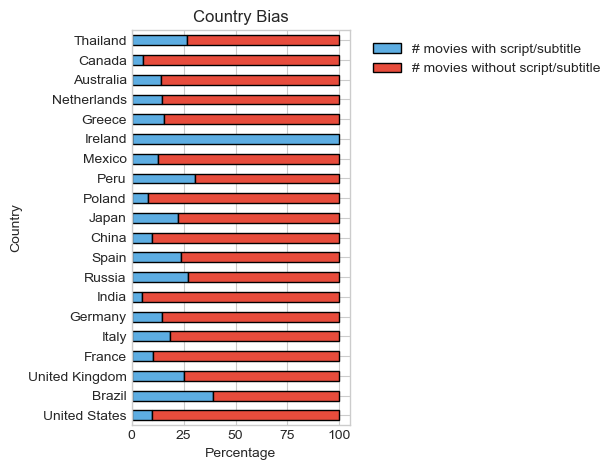

In [130]:
combined_country_bias = {
    'Thailand': 1.3030730438643034, 'Pakistan': 0.21827417145386874, 'United Kingdom': 20.77083003921138,
    'South Africa': 0.280883825063177, 'Austria': 1.2704202302536802, 'Japan': 3.6629742139450086,
    'Italy': 8.89158469830161, 'Saudi Arabia': 0.19339742442777075, 'Vietnam': 0.3409953296131387,
    'China': 3.721773438361729, 'Spain': 3.796163957460484, 'Greece': 2.1671624419019433, 'Russia': 4.283394447493769,
    'Algeria': 0.21313706363193283, 'Mexico': 2.4148154565822724, 'Qatar': 0.2711367820964011, 'Hungary': 0.6750563554840989,
    'Cuba': 1.1580031631199375, 'Turkey': 1.222988368884861, 'Belgium': 0.7523104379025803, 'Poland': 3.04696263614824,
    'Australia': 1.3563282082349088, 'Denmark': 0.6269204455990658, 'Germany': 7.501936413002037, 'Norway': 0.8412406422431413,
    'Morocco': 0.32594049373952894, 'Ireland': 2.2627783013369624, 'India': 5.6304007777855904, 'Kazakhstan': 0.06298708991497959,
    'Finland': 0.19772883554323523, 'Brazil': 31.243184306615383, 'Philippines': 0.510237908867389, 'South Korea': 0.8759633445123111,
    'Nigeria': 0.11573293494485268, 'New Zealand': 0.19804925699955778, 'Kenya': 0.07617878835081623, 'Malaysia': 0.10815159753580902,
    'Iran': 0.3851504846838334, 'Egypt': 0.990593845921805, 'Canada': 1.324493113376049, 'Switzerland': 1.2501953157993693,
    'Argentina': 0.4085923546729583, 'Netherlands': 1.8017337430859084, 'Ecuador': 1.185279146929086, 'Peru': 2.554044180988489,
    'Soviet Union': 1.113836345467099, 'Sri Lanka': 0.07583432280391017, 'United States': 33.29530534078903, 'Sweden': 1.1137793306177504,
    'Guatemala': 0.03848777919455296, 'Ukraine': 0.16997650315211937, 'Lebanon': 0.2245195441022351, 'Romania': 0.38896055441327376,
    'Singapore': 0.02920506276445242, 'Serbia': 0.2848168511594966, 'Hong Kong': 0.7907803637607698, 'Portugal': 0.6523332919704414,
    'Indonesia': 0.11108110237306568, 'Israel': 0.7255945975292928, 'France': 13.856891841458834, 'Czech Republic': 0.8875254367356931,
    'Iraq': 0.3782340342780184, 'Belarus': 0.13051817345726868, 'Ethiopia': 0.11727255554919327, 'Nepal': 0.044313818110300995,
    'United Arab Emirates': 0.2820789801206115
}

# Data for Final Summary Bias and Script/Subtitle Bias
final_summary_bias = {
    'Brazil': 12.395856890858926, 'Hong Kong': 0.3717942919173187, 'Russia': 1.2022253380976073, 'Australia': 0.5536206974535257,
    'Japan': 1.3433443394092903, 'China': 0.7942466868696006, 'United Kingdom': 5.142702067031526, 'France': 2.869419693337555,
    'Italy': 1.650006784567371, 'Germany': 2.3013252521597543, 'United States': 6.464335790854403, 'Czech Republic': 0.26505043195078926,
    'Soviet Union': 0.5454792166086209, 'Poland': 0.4468768374869962, 'Norway': 0.2342937265367045, 'Israel': 0.2370075534850061,
    'Netherlands': 0.3980279524175675, 'Peru': 0.5427653896603193, 'Ireland': 0.4061694332624723, 'India': 1.3442489483920577,
    'Mexico': 0.6042788004884889, 'Ecuador': 0.05699036591433353, 'Sweden': 0.35551133022750914, 'Spain': 0.7752498982314895,
    'Cuba': 0.13930978334614863, 'Greece': 0.4224523949522819, 'South Korea': 0.4803473698493826, 'Ukraine': 0.11036229589759827,
    'Canada': 0.40164638834863625, 'South Africa': 0.0805101994662807, 'Nigeria': 0.041612013207291146, 'Vietnam': 0.0859378533628839,
    'Iran': 0.27138269483015964, 'Switzerland': 0.1691618797774662, 'Egypt': 0.28133339364059884, 'Thailand': 0.34556063141707,
    'Serbia': 0.22524763670903253, 'Hungary': 0.21981998281242932, 'United Arab Emirates': 0.06965489167307432, 'Iraq': 0.09860237912162467,
    'Belgium': 0.14473743724275182, 'Pakistan': 0.08774707132841829, 'Kazakhstan': 0.02442444253471437, 'Turkey': 0.5165317291600705,
    'Malaysia': 0.03527975032792076, 'Austria': 0.2361029445022389, 'Belarus': 0.022615224569179974, 'Denmark': 0.2560043421231173,
    'Ethiopia': 0.022615224569179974, 'Philippines': 0.09769777013885748, 'Algeria': 0.06422723777647112, 'Argentina': 0.16373422588086298,
    'Saudi Arabia': 0.03799357727622235, 'Portugal': 0.1655434438463974, 'Morocco': 0.0823194174318151, 'Sri Lanka': 0.028042878465783166,
    'Indonesia': 0.05879958387986793, 'Romania': 0.14654665520828622, 'Lebanon': 0.05608575693156633, 'Kenya': 0.019901397620878374,
    'Finland': 0.17911257858790539, 'New Zealand': 0.020806006603645573, 'Qatar': 0.003618435931068796, 'Nepal': 0.013569134741507984,
    'Guatemala': 0.0063322628793703924, 'Singapore': 0.005427653896603194
}

script_subtitle_bias = {
    'United States': 60.12627489072399, 'South Korea': 3.223607249156119, 'Germany': 13.282941030015066, 'Brazil': 19.204888335903347,
    'France': 25.06673287178647, 'India': 25.49179980426416, 'China': 7.462541173226506, 'Russia': 3.241207109255107,
    'Italy': 7.20158261936566, 'Japan': 4.619012860535942, 'Mexico': 4.163514038324694, 'South Africa': 1.6583796225930793,
    'United Kingdom': 15.185840455819625, 'Poland': 5.421133298903673, 'Spain': 2.4676463663708123, 'Greece': 2.285592252781661,
    'Pakistan': 0.13980197958153352, 'Canada': 6.945058264830513, 'Netherlands': 2.3312830447476943, 'Australia': 3.3694705808933835,
    'Algeria': 0.1483653378398257, 'Belgium': 0.46357220118502857, 'Kazakhstan': 0.03856284705326078, 'Turkey': 0.7066816363088907,
    'Sweden': 1.5463286602795855, 'Thailand': 0.9571884548975326, 'Serbia': 0.11631244705046193, 'Czech Republic': 0.2710478357345957,
    'Portugal': 0.4854678282110435, 'Iran': 0.11376743126855776, 'Pakistan': 0.2373583237598065, 'Peru': 1.2352787915184445,
    'Hong Kong': 0.41940222866551976, 'Finland': 0.01843760395732957, 'Algeria': 0.06068168840541413, 'Lebanon': 0.06176486350472408,
    'Sri Lanka': 0.014284091835456356, 'Egypt': 0.7092601730416063, 'Indonesia': 0.0527181350081252, 'Vietnam': 0.25139116827826724,
    'Qatar': 0.055484372425904576, 'Switzerland': 0.21066923590136112, 'Turkey': 0.2683562296191467, 'Romania': 0.054413968999318516,
    'Malaysia': 0.051528077804801935
}

all_countries = set(combined_country_bias.keys())
df_bias = pd.DataFrame({
    'Country': list(all_countries),
    'Combined Bias': [combined_country_bias.get(country, 0) for country in all_countries],
    'Final Summary Bias': [final_summary_bias.get(country, 0) for country in all_countries],
    'Script/Subtitle Bias': [script_subtitle_bias.get(country, 0) for country in all_countries]
})

# Normalize the bias to ensure the sum of the two categories is 100% for each country
df_bias['Total Bias'] = df_bias['Final Summary Bias'] + df_bias['Script/Subtitle Bias']
df_bias['Final Summary Bias %'] = (df_bias['Final Summary Bias'] / df_bias['Total Bias']) * 100
df_bias['Script/Subtitle Bias %'] = (df_bias['Script/Subtitle Bias'] / df_bias['Total Bias']) * 100

df_bias_sorted = df_bias.sort_values(by='Combined Bias', ascending=False).head(20)

plt.figure(figsize=(14, 10))
df_bias_sorted.plot(
    x='Country', 
    y=['Final Summary Bias %', 'Script/Subtitle Bias %'], 
    kind='barh', 
    stacked=True, 
    color=['#5DADE2', '#E74C3C'], 
    edgecolor='black'
)
plt.title('Country Bias')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.legend(['# movies with script/subtitle', '# movies without script/subtitle'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Implement a Function to Detect 'Decade Bias' 

In [6]:
# Create a Decade column in base_details based on release_year
base_details['Decade'] = (release_dates['release_year'] // 10) * 10


In [7]:
# Add a new column indicating whether each movie has script/subtitle text
base_details['Has_Subtitles'] = data['Script/Subtitle Text'].notna()

# Group by Decade and calculate counts
decade_counts = base_details.groupby('Decade')['Has_Subtitles'].value_counts().unstack(fill_value=0)
decade_counts.columns = ['Movies_Without_Subtitles', 'Movies_With_Subtitles']

In [8]:
decade_counts['Total_Movies'] = decade_counts['Movies_With_Subtitles'] + decade_counts['Movies_Without_Subtitles']

# Calculate bias percentages for each decade
decade_counts['With_Subtitles_Percentage'] = (decade_counts['Movies_With_Subtitles'] / decade_counts['Total_Movies']) * 100
decade_counts['Without_Subtitles_Percentage'] = (decade_counts['Movies_Without_Subtitles'] / decade_counts['Total_Movies']) * 100

In [9]:
# Create dictionaries for the bias percentages
summary_decade_bias = decade_counts['Without_Subtitles_Percentage'].to_dict()
script_decade_bias = decade_counts['With_Subtitles_Percentage'].to_dict()

In [10]:
print("Final Summary Decade Bias:", summary_decade_bias)
print("Script/Subtitle Decade Bias:", script_decade_bias)

Final Summary Decade Bias: {1890.0: 50.0, 1900.0: 66.66666666666666, 1910.0: 80.22598870056498, 1920.0: 85.10998307952623, 1930.0: 85.43103448275862, 1940.0: 83.46007604562737, 1950.0: 82.95819935691318, 1960.0: 84.21623968736431, 1970.0: 84.11934552454284, 1980.0: 84.14339419978518, 1990.0: 84.59400436767918, 2000.0: 84.09578618806086, 2010.0: 84.14797725077798, 2020.0: 84.05563610976854}
Script/Subtitle Decade Bias: {1890.0: 50.0, 1900.0: 33.33333333333333, 1910.0: 19.774011299435028, 1920.0: 14.890016920473773, 1930.0: 14.56896551724138, 1940.0: 16.53992395437262, 1950.0: 17.041800643086816, 1960.0: 15.783760312635692, 1970.0: 15.88065447545717, 1980.0: 15.856605800214824, 1990.0: 15.405995632320826, 2000.0: 15.904213811939133, 2010.0: 15.85202274922202, 2020.0: 15.944363890231458}


<Figure size 1400x1000 with 0 Axes>

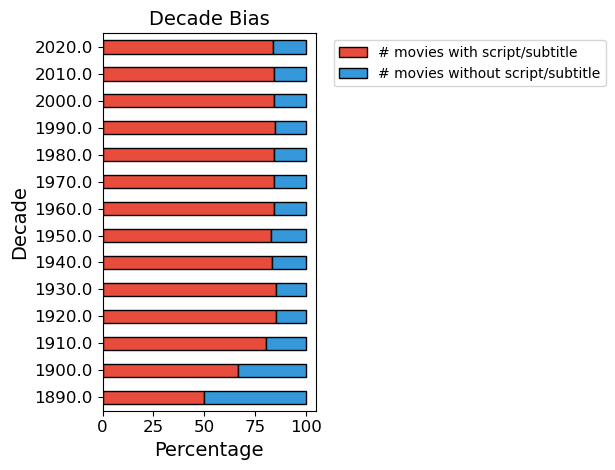

In [11]:
final_summary_decade_bias = {1890.0: 50.0, 1900.0: 66.66666666666666, 1910.0: 80.22598870056498, 1920.0: 85.10998307952623,
                             1930.0: 85.43103448275862, 1940.0: 83.46007604562737, 1950.0: 82.95819935691318, 1960.0: 84.21623968736431,
                             1970.0: 84.11934552454284, 1980.0: 84.14339419978518, 1990.0: 84.59400436767918, 2000.0: 84.09578618806086,
                             2010.0: 84.14797725077798, 2020.0: 84.05563610976854}

script_subtitle_decade_bias = {1890.0: 50.0, 1900.0: 33.33333333333333, 1910.0: 19.774011299435028, 1920.0: 14.890016920473773,
                               1930.0: 14.56896551724138, 1940.0: 16.53992395437262, 1950.0: 17.041800643086816, 1960.0: 15.783760312635692,
                               1970.0: 15.88065447545717, 1980.0: 15.856605800214824, 1990.0: 15.405995632320826, 2000.0: 15.904213811939133,
                               2010.0: 15.85202274922202, 2020.0: 15.944363890231458}

# Create a DataFrame from the dictionaries
decades = list(final_summary_decade_bias.keys())
df_bias = pd.DataFrame({
    'Decade': decades,
    'Final Summary Bias': [final_summary_decade_bias[decade] for decade in decades],
    'Script/Subtitle Bias': [script_subtitle_decade_bias[decade] for decade in decades]
})

# Plot the horizontal stacked bar chart
plt.figure(figsize=(14, 10))

# Create horizontal stacked bar chart
df_bias.plot(
    x='Decade', 
    y=['Final Summary Bias', 'Script/Subtitle Bias'], 
    kind='barh',  # Change to horizontal bar chart
    stacked=True, 
    color=['#e74c3c', '#3498db'],  # Blue for Final Summary, Red for Script/Subtitle
    edgecolor='black'
)

# Customize the plot
plt.title('Decade Bias', fontsize=14)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Decade', fontsize=14)
plt.legend(['# movies with script/subtitle', '# movies without script/subtitle'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()


#### Function to Detect Genre Bias 

In [3]:
from collections import Counter

# Define keywords associated with each genre
genre_keywords = {
    'Action': ['action', 'fight', 'explosion', 'battle', 'chase'],
    'Comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke'],
    'Drama': ['drama', 'emotional', 'relationship', 'tragedy', 'conflict'],
    'Horror': ['horror', 'scary', 'fear', 'ghost', 'monster'],
    'Romance': ['romance', 'love', 'relationship', 'romantic', 'passion'],
    'Science Fiction': ['sci-fi', 'science fiction', 'futuristic', 'alien', 'space'],
    'Fantasy': ['fantasy', 'magic', 'mythical', 'wizard', 'dragon'],
    'Thriller': ['thriller', 'suspense', 'mystery', 'twist', 'tension'],
    'Documentary': ['documentary', 'real-life', 'interview', 'biography', 'history'],
    'Adventure': ['adventure', 'explore', 'journey', 'quest', 'expedition'],
    'Animation': ['animation', 'animated', 'cartoon', 'anime', '3D'],
    'Musical': ['musical', 'singing', 'music', 'dance', 'song'],
    'Crime': ['crime', 'murder', 'detective', 'investigation', 'mafia'],
    'Western': ['western', 'cowboy', 'sheriff', 'wild west', 'outlaw'],
    'War': ['war', 'battle', 'army', 'soldier', 'combat'],
    'Biography': ['biography', 'life story', 'memoir', 'biopic', 'true story'],
    'Family': ['family', 'kid', 'children', 'child', 'parental'],
}


In [4]:
# Function to detect genre mentions in a text
def detect_genre_mentions(text):
    genre_count = Counter()
    if pd.notnull(text):  # Only analyze non-null text
        for genre, keywords in genre_keywords.items():
            for keyword in keywords:
                if keyword.lower() in text.lower():
                    genre_count[genre] += 1
    return genre_count

# Apply the function to both columns separately
data['final_summary_genre_mentions'] = data['final_summary'].apply(detect_genre_mentions)
data['script_genre_mentions'] = data['Script/Subtitle Text'].apply(detect_genre_mentions)

In [5]:
# Aggregate counts for each column
final_summary_mentions = Counter()
script_mentions = Counter() 
for count_dict in data['final_summary_genre_mentions']:
    final_summary_mentions.update(count_dict)

for count_dict in data['script_genre_mentions']:
    script_mentions.update(count_dict)

# Total movies where `final_summary` and `Script/Subtitle Text` are not null
total_movies_summary = data['final_summary'].notna().sum()
total_movies_script = data['Script/Subtitle Text'].notna().sum()

# Calculate genre bias percentages for each column
summary_genre_bias = {genre: (count / total_movies_summary) * 100 for genre, count in final_summary_mentions.items()}
script_genre_bias = {genre: (count / total_movies_script) * 100 for genre, count in script_mentions.items()} 

# Combine results by averaging percentages from both columns
combined_genre_bias = {}
for genre in set(summary_genre_bias.keys()).union(script_genre_bias.keys()):
    summary_pct = summary_genre_bias.get(genre, 0)
    script_pct = script_genre_bias.get(genre, 0)
    combined_genre_bias[genre] = (summary_pct + script_pct) / 2  # Average percentage

print("Final Summary Genre Bias:", summary_genre_bias)
print("Script/Subtitle Genre Bias:", script_genre_bias)
print("Combined Genre Bias:", combined_genre_bias)

Final Summary Genre Bias: {'Action': 16.39241937672441, 'Comedy': 5.598624994346194, 'Romance': 24.81161517933873, 'Science Fiction': 2.7310145189741735, 'Documentary': 6.034646524039983, 'Adventure': 12.135329503821973, 'Musical': 8.350445519924014, 'Crime': 14.860916368899543, 'War': 20.756253109593377, 'Family': 27.556198833054413, 'Drama': 10.06287032430232, 'Horror': 6.398299335112398, 'Fantasy': 2.6894025057668824, 'Thriller': 3.361526979962911, 'Western': 2.1674431227102087, 'Animation': 0.9326518612329822, 'Biography': 1.0430141571305804}
Script/Subtitle Genre Bias: {'Action': 93.5802905205528, 'Comedy': 96.37953110512606, 'Drama': 36.17819771292331, 'Romance': 92.32195681928562, 'Documentary': 27.180007947370743, 'Adventure': 62.42218199479006, 'Musical': 94.5472206278423, 'Western': 17.245794516314188, 'War': 98.36637379133737, 'Family': 153.08402136959688, 'Horror': 50.351008874563995, 'Fantasy': 20.535122963486245, 'Thriller': 23.449158903262838, 'Crime': 58.333701267164116

<Figure size 1200x800 with 0 Axes>

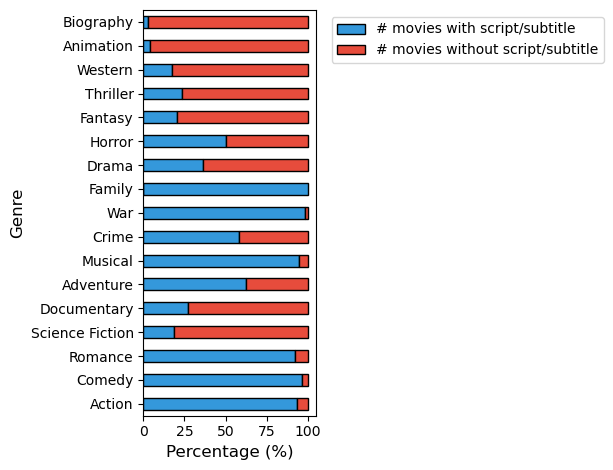

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Original data for script availability percentages per genre
final_summary_genre_bias = {
    'Action': 16.39, 'Comedy': 5.6, 'Romance': 24.81, 'Science Fiction': 2.73, 
    'Documentary': 6.03, 'Adventure': 12.14, 'Musical': 8.35, 'Crime': 14.86, 
    'War': 20.76, 'Family': 27.56, 'Drama': 10.06, 'Horror': 6.4, 'Fantasy': 2.69, 
    'Thriller': 3.36, 'Western': 2.17, 'Animation': 0.93, 'Biography': 1.04
}
script_genre_bias = {
    'Action': 93.58, 'Comedy': 96.38, 'Drama': 36.18, 'Romance': 92.32, 
    'Documentary': 27.18, 'Adventure': 62.42, 'Musical': 94.55, 'Western': 17.25, 
    'War': 98.37, 'Family': 153.08, 'Horror': 50.35, 'Fantasy': 20.54, 
    'Thriller': 23.45, 'Crime': 58.33, 'Science Fiction': 18.35, 'Biography': 2.98, 
    'Animation': 3.89
}

# Normalize values to ensure each genre's total is within 100%
genres = list(final_summary_genre_bias.keys())
with_script = []
without_script = []

for genre in genres:
    with_script_percentage = script_genre_bias[genre]
    # Cap the "with script/subtitle" percentage at 100 if it exceeds it
    if with_script_percentage > 100:
        with_script_percentage = 100
    without_script_percentage = 100 - with_script_percentage
    
    with_script.append(with_script_percentage)
    without_script.append(without_script_percentage)

# Create DataFrame with normalized values
df_genre_bias = pd.DataFrame({
    'Genre': genres,
    '# movies with script/subtitle': with_script,
    '# movies without script/subtitle': without_script
})

# Plotting
plt.figure(figsize=(12, 8))

# Create horizontal stacked bar chart
df_genre_bias.plot(
    x='Genre', 
    y=['# movies with script/subtitle', '# movies without script/subtitle'], 
    kind='barh',  # Horizontal bar chart
    stacked=True, 
    color=['#3498db', '#e74c3c'],  # Blue for "with" and red for "without"
    edgecolor='black'
)

# Customize the plot
# plt.title('Genre Representation', fontsize=10)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.legend(['# movies with script/subtitle', '# movies without script/subtitle'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([0, 25, 50, 75, 100], fontsize=10)  # X-axis from 0 to 100
plt.yticks(fontsize=10)  # Keep genre labels readable

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()
